In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, nd

In [2]:
#加载大小为256的数据集
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
#每个样本28*28px
#向量长度784
num_inputs = 784
num_outputs = 10

W = nd.random.normal(scale = 0.01, shape = (num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [5]:
W.attach_grad()
b.attach_grad()

In [15]:
X = nd.array([[[1, 1], [2, 2], [3, 3]], [[4, 4], [5, 5], [6, 6]]])
X.reshape((2, 6))


[[1. 1. 2. 2. 3. 3.]
 [4. 4. 5. 5. 6. 6.]]
<NDArray 2x6 @cpu(0)>

In [57]:
#X的行数是样本数，列数是输出个数
#对于每个样本，作softmax运算
"""
思考题：直接用softmax运算会带来怎样的后果？
时间爆炸，可以考虑求一次X/X.max()
"""
def softmax(X):
    X = X / X.max(axis = 1, keepdims = True)
    X_exp = X.exp()
    partition = X_exp.sum(axis = 1, keepdims = True)
    return X_exp / partition

In [58]:
#检验一下
X = nd.random.normal(shape=(2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis = 1)

(
 [[0.13496126 0.22826456 0.4058888  0.0681134  0.16277198]
  [0.22374493 0.14188763 0.3108345  0.12757134 0.19596156]]
 <NDArray 2x5 @cpu(0)>,
 
 [1. 1.]
 <NDArray 2 @cpu(0)>)

In [59]:
#reshape((-1, num_inputs))模糊控制，不知道有多少个样本，反正全都这么做
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [60]:
y_hat = nd.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = nd.array([0, 2], dtype = 'int32')
nd.pick(y_hat, y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [61]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

In [62]:
def accuracy(y_hat , y):
    return (y_hat.argmax(axis = 1) == y.astype('float32')).mean().asscalar()

In [63]:
accuracy(y_hat, y)

0.5

In [64]:
#X大小为样本数*类别数，y大小为类别数*1
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis = 1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [65]:
evaluate_accuracy(test_iter, net)

0.8458

In [66]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params = None, lr = None, trainer = None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
             % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [67]:
num_epochs, lr = 5, 0.001
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr, None)

epoch 1, loss 1.4992, train acc 0.845, test acc 0.846
epoch 2, loss 1.4791, train acc 0.844, test acc 0.846
epoch 3, loss 1.4566, train acc 0.844, test acc 0.846
epoch 4, loss 1.4313, train acc 0.844, test acc 0.846
epoch 5, loss 1.4020, train acc 0.844, test acc 0.846


In [47]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
true_labels[0:10], pred_labels[0:10]

(['t-shirt',
  'trouser',
  'pullover',
  'pullover',
  'dress',
  'pullover',
  'bag',
  'shirt',
  'sandal',
  't-shirt'],
 ['t-shirt',
  'trouser',
  'pullover',
  't-shirt',
  'coat',
  'shirt',
  'bag',
  'shirt',
  'sandal',
  't-shirt'])

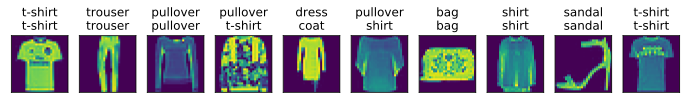

In [44]:
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:10], titles[0:10])

In [56]:
X = nd.array([[1,2], [3,4]])
X / X.max(axis = 1, keepdims = True)


[[0.5  1.  ]
 [0.75 1.  ]]
<NDArray 2x2 @cpu(0)>